TITLE: ADDRESSING HIGH MORTALITY IN AFRICA: SOCIOECONOMIC, HEALTH CARE AND ENVIRONMENTAL INSIGHTS

Goal: Identification of factors contributing to mortality and actionable insights for policy makers 

Introduction: 
Child and maternal mortality remain significant public health challenges worldwide, influenced by a complex interplay of socioeconomic, healthcare, and environmental factors. This project aims to analyze the health indicators, including vaccination coverage, healthcare access, and maternal support, to uncover key drivers of high mortality rates. By leveraging a comprehensive dataset spanning multiple countries, the analysis identifies gaps in vaccination coverage, healthcare systems, and maternal care that contribute to poor child survival outcomes.
Furthermore, the project provides actionable recommendations to address these gaps and improve healthcare delivery. The insights are presented in a clear and accessible format, designed to inform policymakers, healthcare stakeholders, and development agencies, enabling data-driven interventions to reduce mortality rates in Africa.
Here is the link to the dataset https://drive.google.com/file/d/1myW9sMtrkFT11kmtS8w5_Mwc_DlyWv6H/viewS

In [1]:
#import the necessary libraries which might be needed for analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#to display all of the columns clearly without anyone being broken or cut out
pd.set_option('display.max_columns', None)

DATA IMPORTATION, CLEANING AND PREPROCESSING

1. Health protection coverage dataset

In [2]:
#importing and reading the dataset
df1 = pd.read_csv (r"C:\Users\HP\Downloads\ALTSCHOOL\Regonet Personal project\Infant Mortality Dataset\8. health-protection-coverage.csv")
df1.head(2)

,Entity,Code,Year,Share of population covered by health insurance (ILO (2014))
0,Albania,ALB,2008,23.6
1,Algeria,DZA,2005,85.2


In [3]:
#checking for the shape
df1.shape

(162, 4)

In [4]:
#dropping the code column
df1.drop(columns = ["Code"], inplace = True)
df1.columns

Index(['Entity', 'Year',
       'Share of population covered by health insurance (ILO (2014))'],
      dtype='object')

In [5]:
#checking for the sum of null values for each column
df1.isnull().sum()

Entity                                                          0
Year                                                            0
Share of population covered by health insurance (ILO (2014))    0
dtype: int64

In [6]:
#checking for duplicate values
df1.duplicated().sum()

0

In [7]:
#renaming of column
df1.rename(columns = {"Entity" : "Location"}, inplace = True)

In [8]:
#checking for the columns to ensure replacement of the column name was successful
df1.columns

Index(['Location', 'Year',
       'Share of population covered by health insurance (ILO (2014))'],
      dtype='object')

2. Global vaccination coverage data

In [9]:
#importing and reading of the data
df2 = pd.read_csv (r"C:\Users\HP\Downloads\ALTSCHOOL\Regonet Personal project\Infant Mortality Dataset\7. global-vaccination-coverage.csv")
df2.head(2)

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0


In [10]:
#checking for the shape of the dataset
df2.shape

(7897, 14)

In [11]:
drop_columns = ["Code", 'Hib3 (% of one-year-olds immunized)',
               'IPV1 (% of one-year-olds immunized)',
               'PCV3 (% of one-year-olds immunized)',
               'RCV1 (% of one-year-olds immunized)',
               'RotaC (% of one-year-olds immunized)',
               'YFV (% of one-year-olds immunized)']
df2.drop(columns = drop_columns, inplace = True)
df2.columns

Index(['Entity', 'Year', 'BCG (% of one-year-olds immunized)',
       'HepB3 (% of one-year-olds immunized)',
       'MCV1 (% of one-year-olds immunized)',
       'Pol3 (% of one-year-olds immunized)',
       'DTP3 (% of one-year-olds immunized)'],
      dtype='object')

In [12]:
#checking for missing values
df2.isnull().sum()

Entity                                     0
Year                                       0
BCG (% of one-year-olds immunized)      1400
HepB3 (% of one-year-olds immunized)    3461
MCV1 (% of one-year-olds immunized)      169
Pol3 (% of one-year-olds immunized)       42
DTP3 (% of one-year-olds immunized)       43
dtype: int64

In [13]:
#replacing all the numeric missing values using the median of each column 
#assigning a variable name to the columns i would like to fill
fill_columns = ['BCG (% of one-year-olds immunized)',
                'HepB3 (% of one-year-olds immunized)',
                'MCV1 (% of one-year-olds immunized)',
                'Pol3 (% of one-year-olds immunized)',
                'DTP3 (% of one-year-olds immunized)']
#filling the columns with the median values
df2[fill_columns] = df2[fill_columns].fillna(df2[fill_columns].median())
print(df2.head(2))

        Entity  Year  BCG (% of one-year-olds immunized)  \
0  Afghanistan  1982                                10.0   
1  Afghanistan  1983                                10.0   

   HepB3 (% of one-year-olds immunized)  MCV1 (% of one-year-olds immunized)  \
0                                  91.0                                  8.0   
1                                  91.0                                  9.0   

   Pol3 (% of one-year-olds immunized)  DTP3 (% of one-year-olds immunized)  
0                                  5.0                                  5.0  
1                                  5.0                                  5.0  


In [14]:
#to be sure the columns have been filled with the median values and there are no more missing values
df2.head(2)

,Entity,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,1982,10.0,91.0,8.0,5.0,5.0
1,Afghanistan,1983,10.0,91.0,9.0,5.0,5.0


In [15]:
#checking for duplicate values
df2.duplicated().sum()

0

In [16]:
#renaming of column
df2.rename(columns = {"Entity" : "Location"}, inplace = True)

In [17]:
#checking the column name to be sure the replacement was successful
df2.columns

Index(['Location', 'Year', 'BCG (% of one-year-olds immunized)',
       'HepB3 (% of one-year-olds immunized)',
       'MCV1 (% of one-year-olds immunized)',
       'Pol3 (% of one-year-olds immunized)',
       'DTP3 (% of one-year-olds immunized)'],
      dtype='object')

3. Births attended by health staff data

In [18]:
#importing and reading of the dataset
df3 = pd.read_csv (r"C:\Users\HP\Downloads\ALTSCHOOL\Regonet Personal project\Infant Mortality Dataset\6. births-attended-by-health-staff-sdgs.csv")
df3.head(2)

,Entity,Code,Year,Births attended by skilled health staff (% of total)
0,Afghanistan,AFG,2000,12.4
1,Afghanistan,AFG,2003,14.3


In [19]:
#dropping the row column
df3.drop(columns = ["Code"], inplace = True)
#to confirm if the column has been successfully dropped
df3.columns

Index(['Entity', 'Year',
       'Births attended by skilled health staff (% of total)'],
      dtype='object')

In [20]:
#checking for missing values
df3.isnull().sum()

Entity                                                  0
Year                                                    0
Births attended by skilled health staff (% of total)    0
dtype: int64

In [21]:
#checking for the shape
df3.shape

(2985, 3)

In [22]:
#checking for duplicate values
df3.duplicated().sum()

0

In [23]:
#renaming of column
df3.rename(columns = {"Entity" : "Location"}, inplace = True)

In [24]:
#checking for the columns to be sure the rename was successful
df3.columns

Index(['Location', 'Year',
       'Births attended by skilled health staff (% of total)'],
      dtype='object')

4. Number of maternal deaths by region

In [25]:
#importing and reading of the dataset
df4 = pd.read_csv (r"C:\Users\HP\Downloads\ALTSCHOOL\Regonet Personal project\Infant Mortality Dataset\5. number-of-maternal-deaths-by-region.csv")
df4.head(2)

,Entity,Code,Year,Estimated maternal deaths,959828-annotations
0,Afghanistan,AFG,1985,10258.534,NaN
1,Afghanistan,AFG,1986,8671.921,NaN


In [26]:
#checking for the shape of the dataset
df4.shape

(7056, 5)

In [27]:
#checking for the sum of all null values in the dataset
df4.isnull().sum()

Entity                          0
Code                          360
Year                            0
Estimated maternal deaths       0
959828-annotations           7020
dtype: int64

In [28]:
#dropping the code and 959828-annotations column
df4.drop(columns = ["Code", "959828-annotations"], inplace = True)
df4.columns

Index(['Entity', 'Year', 'Estimated maternal deaths'], dtype='object')

In [29]:
#renaming the entity column
df4.rename(columns = {"Entity" : "Location"}, inplace = True)
df4.columns

Index(['Location', 'Year', 'Estimated maternal deaths'], dtype='object')

In [30]:
#checking for missing values
df4.isnull().sum()

Location                     0
Year                         0
Estimated maternal deaths    0
dtype: int64

In [31]:
#checking for duplicate values
df4.duplicated().sum()

0

5. Child mortality by income level of country

In [32]:
#importing and reading of the dataset
df5 = pd.read_csv(r"C:\Users\HP\Downloads\ALTSCHOOL\Regonet Personal project\Infant Mortality Dataset\3. child-mortality-by-income-level-of-country.csv")
df5.head(2)

,Entity,Code,Year,Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625


In [33]:
#checking for missing values in each of the columns
df5.isnull().sum()

Entity                                                                                                                                             0
Code                                                                                                                                            1358
Year                                                                                                                                               0
Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births       0
dtype: int64

In [34]:
#dropping the code column
df5.drop(columns = ["Code"], inplace = True)
df5.columns

Index(['Entity', 'Year',
       'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births'],
      dtype='object')

In [35]:
#checking for the shape of the dataset
df5.shape

(14200, 3)

In [36]:
#renaming of the columns
df5.rename(columns = {"Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births" :
                      "Under-five mortality rate (per 100 live births)",
                      "Entity" : "Location"}, inplace = True)
df5.columns

Index(['Location', 'Year', 'Under-five mortality rate (per 100 live births)'], dtype='object')

In [37]:
#checking for duplicate values
df5.duplicated().sum()

0

6. Number of infants death

In [38]:
#importing and reading of the dataset
df6 = pd.read_csv (r"C:\Users\HP\Downloads\ALTSCHOOL\Regonet Personal project\Infant Mortality Dataset\2. number-of-infant-deaths-unwpp.csv")
df6.head(2)

,Entity,Code,Year,Deaths - Sex: all - Age: 0 - Variant: estimates
0,Afghanistan,AFG,1950,109220.0
1,Afghanistan,AFG,1951,107971.0


In [39]:
#checking for the shape of the dataset
df6.shape

(18944, 4)

In [40]:
#dropping the code column
df6.drop(columns = ["Code"], inplace = True)
df6.columns

Index(['Entity', 'Year', 'Deaths - Sex: all - Age: 0 - Variant: estimates'], dtype='object')

In [41]:
#renaming some columns
df6.rename(columns = {"Deaths - Sex: all - Age: 0 - Variant: estimates" : "Total number of infants death (age 0) per year",
                     "Entity" : "Location",}, inplace = True)
df6.columns

Index(['Location', 'Year', 'Total number of infants death (age 0) per year'], dtype='object')

In [42]:
#checking for missing values 
df6.isnull().sum()

Location                                          0
Year                                              0
Total number of infants death (age 0) per year    0
dtype: int64

In [43]:
#checking for duplicate values
df6.duplicated().sum()

0

7. Youth mortality rate

In [44]:
#importing and reading of the dataset
df7 = pd.read_csv (r"C:\Users\HP\Downloads\ALTSCHOOL\Regonet Personal project\Infant Mortality Dataset\1. youth-mortality-rate.csv")
df7.head(2)

,Entity,Code,Year,Under-fifteen mortality rate
0,Afghanistan,AFG,1977,30.110573
1,Afghanistan,AFG,1978,29.290777


In [45]:
#checking for the shape of the dataset
df7.shape

(10515, 4)

In [46]:
#checking for missing values
df7.isnull().sum()

Entity                             0
Code                            1023
Year                               0
Under-fifteen mortality rate       0
dtype: int64

In [47]:
#dropping the code columns
df7.drop(columns = ["Code"], inplace = True)
df7.columns

Index(['Entity', 'Year', 'Under-fifteen mortality rate'], dtype='object')

In [48]:
#renaming the entity column
df7.rename(columns = {"Entity" : "Location"}, inplace = True)
df7.columns

Index(['Location', 'Year', 'Under-fifteen mortality rate'], dtype='object')

In [49]:
#checking for duplicate values
df7.duplicated().sum()

0

8. Distribution of cause of death among children

In [50]:
#importing and reading of the dataset
df8 = pd.read_csv (r"C:\Users\HP\Downloads\ALTSCHOOL\Regonet Personal project\Infant Mortality Dataset\4. Distribution of Causes of Death among Children Aged less than 5 years.csv")
df8.head(2)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,True,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Other noncommunicable diseases,CHILDCAUSE_CH16,NaN,NaN,NaN,NaN,NaN,NaN,0.0006,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
1,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,True,Age Group,0-27 days,AGEGROUP_DAYS0-27,Cause of death,Injuries,CHILDCAUSE_CH17,NaN,NaN,NaN,NaN,NaN,NaN,0.0110,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z


In [51]:
#checking for missing values
df8.isnull().sum()

IndicatorCode                      0
Indicator                          0
ValueType                          0
ParentLocationCode                 0
ParentLocation                     0
Location type                      0
SpatialDimValueCode                0
Location                           0
Period type                        0
Period                             0
IsLatestYear                       0
Dim1 type                          0
Dim1                               0
Dim1ValueCode                      0
Dim2 type                          0
Dim2                               0
Dim2ValueCode                      0
Dim3 type                     146664
Dim3                          146664
Dim3ValueCode                 146664
DataSourceDimValueCode        146664
DataSource                    146664
FactValueNumericPrefix        146664
FactValueNumeric                   0
FactValueUoM                  146664
FactValueNumericLowPrefix     146664
FactValueNumericLow           146664
F

In [52]:
#checking for the shape of the dataset
df8.shape

(146664, 34)

In [53]:
#renaming of columns
df8.rename(columns = {"ParentLocation" : "Parent Location",
                      "Dim1" : "Under Age 5 group",
                      "Dim2" : "Cause of Death",
                      "Period" : "Year"}, inplace = True)
df8.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'Parent Location', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Year', 'IsLatestYear', 'Dim1 type', 'Under Age 5 group',
       'Dim1ValueCode', 'Dim2 type', 'Cause of Death', 'Dim2ValueCode',
       'Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode',
       'DataSource', 'FactValueNumericPrefix', 'FactValueNumeric',
       'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')

In [54]:
#will be dropping some of the columns at once
#assigning a variable to all the columns i want to drop
drop_columns = ['IndicatorCode', 'Indicator', 'ValueType', 'Period type',
                'IsLatestYear', 'Dim1 type', 'Dim1ValueCode', 'Dim2 type', 'ParentLocationCode',
                'Dim2ValueCode','Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode',
                'DataSource', 'FactValueNumericPrefix', 'FactValueNumeric',
                'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericLow',
                'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value', 'Location type',
                'FactValueTranslationID', 'FactComments', 'Language', 'DateModified', 'SpatialDimValueCode']
df8.drop(columns = drop_columns, inplace = True)
df8.columns

Index(['Parent Location', 'Location', 'Year', 'Under Age 5 group',
       'Cause of Death'],
      dtype='object')

In [55]:
#checking for duplicate values
df8.duplicated().sum()

0

MERGING OF THE DATASETS TOGETHER INTO A WHOLE DATASET

In [56]:
#merging of the eight different dataset from above into one dataset inorder for further analysis to be carried out successfully
merged_df = (pd.merge(df1, df2, on=["Location", "Year"], how="inner")
    .merge(df3, on=["Location", "Year"], how="inner")
    .merge(df4, on=["Location", "Year"], how="inner")
    .merge(df5, on=["Location", "Year"], how="inner")
    .merge(df6, on=["Location", "Year"], how="inner")
    .merge(df7, on=["Location", "Year"], how="inner")
    .merge(df8, on=["Location", "Year"], how="inner"))
print(merged_df.shape)

(3822, 16)


In [57]:
#viewing of the merged dataset
merged_df.head(2)

,Location,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),Births attended by skilled health staff (% of total),Estimated maternal deaths,Under-five mortality rate (per 100 live births),Total number of infants death (age 0) per year,Under-fifteen mortality rate,Parent Location,Under Age 5 group,Cause of Death
0,Antigua and Barbuda,2007,51.1,92.0,97.0,99.0,98.0,99.0,100.0,0.337182,1.267723,13.0,1.516073,Americas,0-27 days,Other noncommunicable diseases
1,Antigua and Barbuda,2007,51.1,92.0,97.0,99.0,98.0,99.0,100.0,0.337182,1.267723,13.0,1.516073,Americas,0-27 days,Injuries


In [58]:
#checking if there are any missing values after merging
merged_df.isnull().sum()

Location                                                        0
Year                                                            0
Share of population covered by health insurance (ILO (2014))    0
BCG (% of one-year-olds immunized)                              0
HepB3 (% of one-year-olds immunized)                            0
MCV1 (% of one-year-olds immunized)                             0
Pol3 (% of one-year-olds immunized)                             0
DTP3 (% of one-year-olds immunized)                             0
Births attended by skilled health staff (% of total)            0
Estimated maternal deaths                                       0
Under-five mortality rate (per 100 live births)                 0
Total number of infants death (age 0) per year                  0
Under-fifteen mortality rate                                    0
Parent Location                                                 0
Under Age 5 group                                               0
Cause of D

In [59]:
#checking for duplicate values
merged_df.duplicated().sum()

0

EXPLORATORY DATA ANALYSIS

In [60]:
merged_df["Location"].value_counts().sort_values(ascending = False)

Location
Antigua and Barbuda    42
Cyprus                 42
Armenia                42
Australia              42
Austria                42
                       ..
Ukraine                42
Uruguay                42
Uzbekistan             42
Yemen                  42
Zimbabwe               42
Name: count, Length: 91, dtype: int64

In [61]:
merged_df["Location"].unique()

array(['Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Canada', 'Central African Republic', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Grenada', 'Guyana', 'Honduras',
       'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Italy', 'Jamaica',
       'Japan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lesotho', 'Lithuania', 'Madagascar', 'Malaysia', 'Maldives',
       'Malta', 'Mauritius', 'Mexico', 'Namibia', 'New Zealand',
       'Nicaragua', 'Nigeria', 'North Macedonia', 'Norway', 'Oman',
       'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Qatar',
       'Romania'

In [62]:
#base on the objective of the project, it was quite specific on analysis for african countries
#will be filtering just the african countries from the pool of location
#assigning a variable name to the african countries
africa = ['Burkina Faso', 'Central African Republic', 'Djibouti', 'Egypt', 'Kenya', 
        'Lesotho', 'Madagascar', 'Mauritius', 'Namibia', 'Nigeria', 'Rwanda', 
        'Sao Tome and Principe', 'Sierra Leone', 'Togo', 'Zimbabwe']

#filtering for just the african countries
africa_df = merged_df[merged_df['Location'].isin(africa)]
print(africa_df['Location'].unique())

['Burkina Faso' 'Central African Republic' 'Djibouti' 'Egypt' 'Kenya'
 'Lesotho' 'Madagascar' 'Mauritius' 'Namibia' 'Nigeria' 'Rwanda'
 'Sao Tome and Principe' 'Sierra Leone' 'Togo' 'Zimbabwe']


In [63]:
#saving the new dataset that contains only the africa countries
africa_df.to_csv('merged_df.csv', index=False)

In [64]:
africa_df.head(2)

,Location,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),Births attended by skilled health staff (% of total),Estimated maternal deaths,Under-five mortality rate (per 100 live births),Total number of infants death (age 0) per year,Under-fifteen mortality rate,Parent Location,Under Age 5 group,Cause of Death
588,Burkina Faso,2010,1.0,99.0,91.0,92.0,90.0,91.0,23.0,2491.198,12.112398,53687.0,14.184238,Africa,0-27 days,"Other communicable, perinatal and nutritional ..."
589,Burkina Faso,2010,1.0,99.0,91.0,92.0,90.0,91.0,23.0,2491.198,12.112398,53687.0,14.184238,Africa,0-27 days,Other noncommunicable diseases


In [65]:
africa_df.shape

(630, 16)

In [66]:
africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 588 to 3821
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Location                                                      630 non-null    object 
 1   Year                                                          630 non-null    int64  
 2   Share of population covered by health insurance (ILO (2014))  630 non-null    float64
 3   BCG (% of one-year-olds immunized)                            630 non-null    float64
 4   HepB3 (% of one-year-olds immunized)                          630 non-null    float64
 5   MCV1 (% of one-year-olds immunized)                           630 non-null    float64
 6   Pol3 (% of one-year-olds immunized)                           630 non-null    float64
 7   DTP3 (% of one-year-olds immunized)                           630 non-nul

In [67]:
africa_df.columns

Index(['Location', 'Year',
       'Share of population covered by health insurance (ILO (2014))',
       'BCG (% of one-year-olds immunized)',
       'HepB3 (% of one-year-olds immunized)',
       'MCV1 (% of one-year-olds immunized)',
       'Pol3 (% of one-year-olds immunized)',
       'DTP3 (% of one-year-olds immunized)',
       'Births attended by skilled health staff (% of total)',
       'Estimated maternal deaths',
       'Under-five mortality rate (per 100 live births)',
       'Total number of infants death (age 0) per year',
       'Under-fifteen mortality rate', 'Parent Location', 'Under Age 5 group',
       'Cause of Death'],
      dtype='object')

Engineering of new coulumns

In [68]:
#calculation of the total of the 'estimated maternity death' column
total_infant_death = africa_df['Total number of infants death (age 0) per year'].sum()
total_under_five = africa_df['Under-five mortality rate (per 100 live births)'].sum()
total_under_fifteen = africa_df['Under-fifteen mortality rate'].sum()
total_maternal_death = africa_df['Estimated maternal deaths'].sum()

#engineering of a new column with percentage values
africa_df['Total Number of infant Death (%)'] = ((africa_df['Total number of infants death (age 0) per year'] / total_infant_death) * 100).round(2)
africa_df['Under-five mortality (%)'] = ((africa_df['Under-five mortality rate (per 100 live births)'] / total_under_five) * 100).round(2)
africa_df['Under-fifteen mortality (%)'] = ((africa_df['Under-fifteen mortality rate'] / total_under_fifteen) * 100).round(2)
africa_df['Estimated maternal death (%)'] = ((africa_df['Estimated maternal deaths'] / total_maternal_death) * 100).round(2)


africa_df.head(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_724\1259611882.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['Total Number of infant Death (%)'] = ((africa_df['Total number of infants death (age 0) per year'] / total_infant_death) * 100).round(2)
C:\Users\HP\AppData\Local\Temp\ipykernel_724\1259611882.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['Under-five mortality (%)'] = ((africa_df['Under-five mortality rate (per 100 live births)'] / total_under_five) * 100).round(2)
C:\Users\

,Location,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),Births attended by skilled health staff (% of total),Estimated maternal deaths,Under-five mortality rate (per 100 live births),Total number of infants death (age 0) per year,Under-fifteen mortality rate,Parent Location,Under Age 5 group,Cause of Death,Total Number of infant Death (%),Under-five mortality (%),Under-fifteen mortality (%),Estimated maternal death (%)
588,Burkina Faso,2010,1.0,99.0,91.0,92.0,90.0,91.0,23.0,2491.198,12.112398,53687.0,14.184238,Africa,0-27 days,"Other communicable, perinatal and nutritional ...",0.14,0.23,0.23,0.06
589,Burkina Faso,2010,1.0,99.0,91.0,92.0,90.0,91.0,23.0,2491.198,12.112398,53687.0,14.184238,Africa,0-27 days,Other noncommunicable diseases,0.14,0.23,0.23,0.06


In [69]:
africa_df.groupby('Location')['Total Number of infant Death (%)'].sum()

Location
Burkina Faso                 5.88
Central African Republic     2.10
Djibouti                     0.00
Egypt                        6.30
Kenya                        6.72
Lesotho                      0.42
Madagascar                   4.20
Mauritius                    0.00
Namibia                      0.42
Nigeria                     64.68
Rwanda                       1.68
Sao Tome and Principe        0.00
Sierra Leone                 2.94
Togo                         1.68
Zimbabwe                     2.94
Name: Total Number of infant Death (%), dtype: float64

In [70]:
#creating a mapping dictionary
location_values = {'Burkina Faso': 5.88, 'Central African Republic': 2.10, 'Djibouti': 0.00, 'Egypt' : 6.30,
                  'Kenya' : 6.72, 'Lesotho' : 0.42, 'Madagascar' : 4.20, 'Mauritius' : 0.00, 'Namibia' : 0.42,
                  'Nigeria' : 64.68, 'Rwanda' : 1.68, 'Sao Tome and Principe' : 0.00, 'Sierra Leone' : 2.94,
                   'Togo' : 1.68, 'Zimbabwe' : 2.94}

#mapping the values to the 'Value' column based on the location column
africa_df['Total Number of infant Death (%)'] = africa_df['Location'].map(location_values)

africa_df.head(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_724\1911481374.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['Total Number of infant Death (%)'] = africa_df['Location'].map(location_values)


,Location,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),Births attended by skilled health staff (% of total),Estimated maternal deaths,Under-five mortality rate (per 100 live births),Total number of infants death (age 0) per year,Under-fifteen mortality rate,Parent Location,Under Age 5 group,Cause of Death,Total Number of infant Death (%),Under-five mortality (%),Under-fifteen mortality (%),Estimated maternal death (%)
588,Burkina Faso,2010,1.0,99.0,91.0,92.0,90.0,91.0,23.0,2491.198,12.112398,53687.0,14.184238,Africa,0-27 days,"Other communicable, perinatal and nutritional ...",5.88,0.23,0.23,0.06
589,Burkina Faso,2010,1.0,99.0,91.0,92.0,90.0,91.0,23.0,2491.198,12.112398,53687.0,14.184238,Africa,0-27 days,Other noncommunicable diseases,5.88,0.23,0.23,0.06


In [71]:
africa_df.groupby('Location')['Under-five mortality (%)'].sum()

Location
Burkina Faso                 9.66
Central African Republic    10.50
Djibouti                     6.72
Egypt                        2.52
Kenya                        4.20
Lesotho                      7.98
Madagascar                   5.88
Mauritius                    1.26
Namibia                      4.62
Nigeria                     10.92
Rwanda                       5.04
Sao Tome and Principe        2.94
Sierra Leone                13.86
Togo                         7.14
Zimbabwe                     7.14
Name: Under-five mortality (%), dtype: float64

In [72]:
#creating a mapping dictionary
location_values = {'Burkina Faso': 9.66, 'Central African Republic': 10.50, 'Djibouti': 6.72, 'Egypt' : 2.52,
                  'Kenya' : 4.20, 'Lesotho' : 7.98, 'Madagascar' : 5.88, 'Mauritius' : 1.26, 'Namibia' : 4.62,
                  'Nigeria' : 10.92, 'Rwanda' : 5.04, 'Sao Tome and Principe' : 2.94, 'Sierra Leone' : 13.86,
                   'Togo' : 7.14, 'Zimbabwe' : 7.14}

#mapping the location values into the coulumn
africa_df['Under-five mortality (%)'] = africa_df['Location'].map(location_values)

africa_df.head(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_724\2229101498.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['Under-five mortality (%)'] = africa_df['Location'].map(location_values)


,Location,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),Births attended by skilled health staff (% of total),Estimated maternal deaths,Under-five mortality rate (per 100 live births),Total number of infants death (age 0) per year,Under-fifteen mortality rate,Parent Location,Under Age 5 group,Cause of Death,Total Number of infant Death (%),Under-five mortality (%),Under-fifteen mortality (%),Estimated maternal death (%)
588,Burkina Faso,2010,1.0,99.0,91.0,92.0,90.0,91.0,23.0,2491.198,12.112398,53687.0,14.184238,Africa,0-27 days,"Other communicable, perinatal and nutritional ...",5.88,9.66,0.23,0.06
589,Burkina Faso,2010,1.0,99.0,91.0,92.0,90.0,91.0,23.0,2491.198,12.112398,53687.0,14.184238,Africa,0-27 days,Other noncommunicable diseases,5.88,9.66,0.23,0.06


In [73]:
africa_df.groupby('Location')['Under-fifteen mortality (%)'].sum()

Location
Burkina Faso                 9.66
Central African Republic    10.92
Djibouti                     6.72
Egypt                        2.52
Kenya                        4.20
Lesotho                      7.56
Madagascar                   5.88
Mauritius                    1.26
Namibia                      5.04
Nigeria                     10.92
Rwanda                       5.46
Sao Tome and Principe        3.36
Sierra Leone                13.02
Togo                         7.14
Zimbabwe                     7.14
Name: Under-fifteen mortality (%), dtype: float64

In [74]:
#creating a mapping dictionary
location_values = {'Burkina Faso': 9.66, 'Central African Republic': 10.50, 'Djibouti': 6.72, 'Egypt' : 2.52,
                  'Kenya' : 4.20, 'Lesotho' : 7.98, 'Madagascar' : 5.88, 'Mauritius' : 1.26, 'Namibia' : 4.62,
                  'Nigeria' : 10.92, 'Rwanda' : 5.04, 'Sao Tome and Principe' : 2.94, 'Sierra Leone' : 13.86,
                   'Togo' : 7.14, 'Zimbabwe' : 7.14}

#mapping the location values into the coulumn
africa_df['Under-fifteen mortality (%)'] = africa_df['Location'].map(location_values)

africa_df.head(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_724\2213674151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['Under-fifteen mortality (%)'] = africa_df['Location'].map(location_values)


,Location,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),Births attended by skilled health staff (% of total),Estimated maternal deaths,Under-five mortality rate (per 100 live births),Total number of infants death (age 0) per year,Under-fifteen mortality rate,Parent Location,Under Age 5 group,Cause of Death,Total Number of infant Death (%),Under-five mortality (%),Under-fifteen mortality (%),Estimated maternal death (%)
588,Burkina Faso,2010,1.0,99.0,91.0,92.0,90.0,91.0,23.0,2491.198,12.112398,53687.0,14.184238,Africa,0-27 days,"Other communicable, perinatal and nutritional ...",5.88,9.66,9.66,0.06
589,Burkina Faso,2010,1.0,99.0,91.0,92.0,90.0,91.0,23.0,2491.198,12.112398,53687.0,14.184238,Africa,0-27 days,Other noncommunicable diseases,5.88,9.66,9.66,0.06


In [75]:
africa_df.groupby('Location')['Estimated maternal death (%)'].sum()

Location
Burkina Faso                 2.52
Central African Republic     2.10
Djibouti                     0.00
Egypt                        0.84
Kenya                        7.14
Lesotho                      0.84
Madagascar                   4.20
Mauritius                    0.00
Namibia                      0.42
Nigeria                     73.50
Rwanda                       1.26
Sao Tome and Principe        0.00
Sierra Leone                 2.52
Togo                         1.26
Zimbabwe                     3.36
Name: Estimated maternal death (%), dtype: float64

In [76]:
#creating a mapping dictionary
location_values = {'Burkina Faso': 2.52, 'Central African Republic': 2.10, 'Djibouti': 0.00, 'Egypt' : 0.84,
                  'Kenya' : 7.14, 'Lesotho' : 0.84, 'Madagascar' : 4.20, 'Mauritius' : 0.00, 'Namibia' : 0.42,
                  'Nigeria' : 73.50, 'Rwanda' : 1.26, 'Sao Tome and Principe' : 0.00, 'Sierra Leone' : 2.52,
                   'Togo' : 1.26, 'Zimbabwe' : 3.36}

#mapping a location values into the coulumn
africa_df['Estimated maternal death (%)'] = africa_df['Location'].map(location_values)

africa_df.head(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_724\809096597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['Estimated maternal death (%)'] = africa_df['Location'].map(location_values)


,Location,Year,Share of population covered by health insurance (ILO (2014)),BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),Births attended by skilled health staff (% of total),Estimated maternal deaths,Under-five mortality rate (per 100 live births),Total number of infants death (age 0) per year,Under-fifteen mortality rate,Parent Location,Under Age 5 group,Cause of Death,Total Number of infant Death (%),Under-five mortality (%),Under-fifteen mortality (%),Estimated maternal death (%)
588,Burkina Faso,2010,1.0,99.0,91.0,92.0,90.0,91.0,23.0,2491.198,12.112398,53687.0,14.184238,Africa,0-27 days,"Other communicable, perinatal and nutritional ...",5.88,9.66,9.66,2.52
589,Burkina Faso,2010,1.0,99.0,91.0,92.0,90.0,91.0,23.0,2491.198,12.112398,53687.0,14.184238,Africa,0-27 days,Other noncommunicable diseases,5.88,9.66,9.66,2.52


1. Identify socioeconomic, healthcare, and environmental factors contributing to high mortality rates.

Socioeconomic factors contributing to high mortality rates

For the socioeconomic factors, will be checking for the impact of the share of population covered by health insurance on the mortality indicators (Under-five mortality rate (per 100 live births), Total number of infants death (age 0) per year and Under-fifteen mortality rate)

C:\Users\HP\AppData\Local\Temp\ipykernel_724\2487672321.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['Insurance Bin'] = pd.cut(africa_df['Share of population covered by health insurance (ILO (2014))'], bins=bins, labels=labels)
C:\Users\HP\AppData\Local\Temp\ipykernel_724\2487672321.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = africa_df.groupby('Insurance Bin')['Under-five mortality (%)'].count().reset_index()
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False i

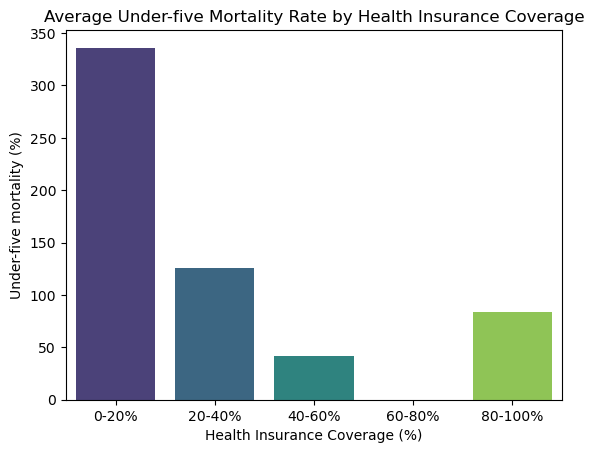

In [77]:
#impact of health insurance and under five mortality rate
#creating bins and labels for grouping of the insurance coverage data
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

#using the pd.cut to categorize the Share of population covered by health insurance column
africa_df['Insurance Bin'] = pd.cut(africa_df['Share of population covered by health insurance (ILO (2014))'], bins=bins, labels=labels)

#group by and data aggregation
bar_data = africa_df.groupby('Insurance Bin')['Under-five mortality (%)'].count().reset_index()

#creating a barchart
sns.barplot(data=bar_data, x='Insurance Bin', y='Under-five mortality (%)', palette="viridis")

#putting titles
plt.title("Average Under-five Mortality Rate by Health Insurance Coverage")
plt.xlabel("Health Insurance Coverage (%)")
plt.ylabel("Under-five mortality (%)")

#showing the barchart
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_724\2585148869.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['Insurance Bin'] = pd.cut(africa_df['Share of population covered by health insurance (ILO (2014))'], bins=bins, labels=labels)
C:\Users\HP\AppData\Local\Temp\ipykernel_724\2585148869.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = africa_df.groupby('Insurance Bin')['Total Number of infant Death (%)'].count().reset_index()
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed

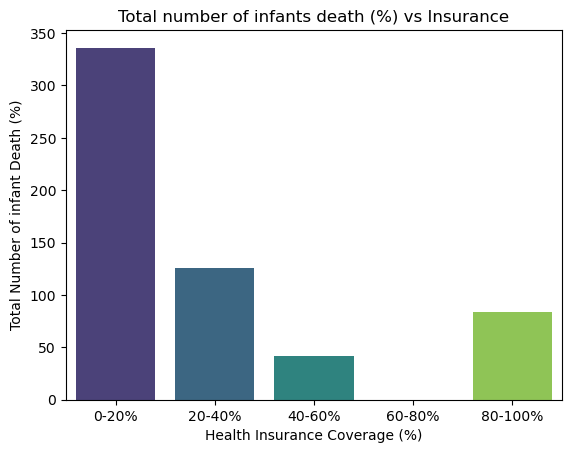

In [78]:
#impact of health insurance and total number of infant death
#creating bins and labels for grouping of the insurance coverage data
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

#using the pd.cut to categorize the Share of population covered by health insurance column
africa_df['Insurance Bin'] = pd.cut(africa_df['Share of population covered by health insurance (ILO (2014))'], bins=bins, labels=labels)

#group by and data aggregation
bar_data = africa_df.groupby('Insurance Bin')['Total Number of infant Death (%)'].count().reset_index()

#creating the barchart
sns.barplot(data=bar_data, x='Insurance Bin', y='Total Number of infant Death (%)', palette="viridis")

#putting the titles
plt.title("Total number of infants death (%) vs Insurance")
plt.xlabel("Health Insurance Coverage (%)")
plt.ylabel("Total Number of infant Death (%)")

#showing the barchart
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_724\104805816.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_df['Insurance Bin'] = pd.cut(africa_df['Share of population covered by health insurance (ILO (2014))'], bins=bins, labels=labels)
C:\Users\HP\AppData\Local\Temp\ipykernel_724\104805816.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = africa_df.groupby('Insurance Bin')['Under-fifteen mortality (%)',].count().reset_index()
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False

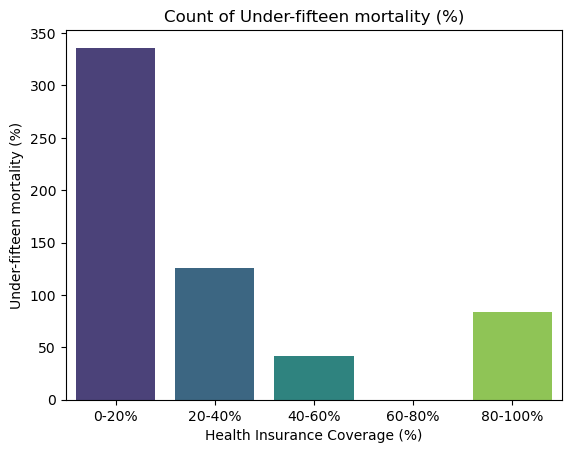

In [79]:
#impact of health insurance and under fifteen mortality rate
#creating bins and labels for grouping of the insurance coverage data
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

#using the pd.cut to categorize the Share of population covered by health insurance column
africa_df['Insurance Bin'] = pd.cut(africa_df['Share of population covered by health insurance (ILO (2014))'], bins=bins, labels=labels)

#grouping of the required columns and aggregation
bar_data = africa_df.groupby('Insurance Bin')['Under-fifteen mortality (%)',].count().reset_index()

#creating a barchart
sns.barplot(data=bar_data, x='Insurance Bin', y='Under-fifteen mortality (%)', palette="viridis")

#putting the titles
plt.title("Count of Under-fifteen mortality (%)")
plt.xlabel("Health Insurance Coverage (%)")
plt.ylabel("Under-fifteen mortality (%)")

#showing the plot
plt.show()

From the above visualization for socioeconomic, we can see that the insurance has an impact on the mortality rate. Therefore, if the share of population for health insurance coverage increases, this will collectively reduce the mortality rate.

Health factors contributing to high mortality rates

For the health factors contributing to mortality rates, will be checking for the impact of births attended by skilled health staff on mortality indicators (Under five mortality and maternal mortality)

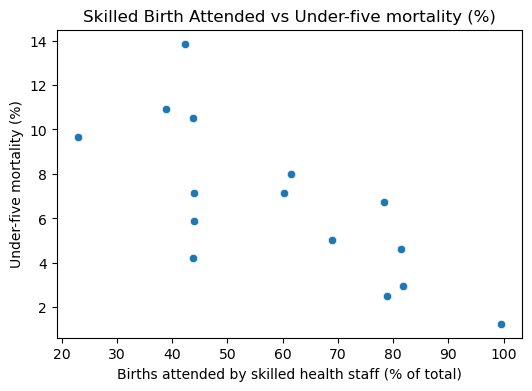

In [80]:
#visualization of the impact of births attended by skilled health staff on under five mortality rate
#creating a figure for the plot
plt.figure(figsize=(6, 4))

#creating the scatter plot
sns.scatterplot(x='Births attended by skilled health staff (% of total)', y='Under-five mortality (%)', data=africa_df)

#putting labels and titles
plt.title("Skilled Birth Attended vs Under-five mortality (%)")
plt.xlabel("Births attended by skilled health staff (% of total)")
plt.ylabel("Under-five mortality (%)")

#showing the plot
plt.show()

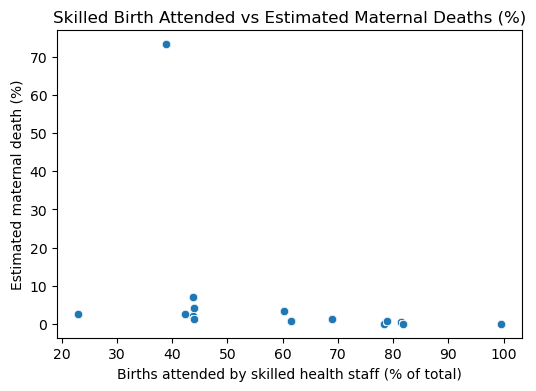

In [81]:
#visualization of the impact of births attended by skilled health staff on estimated maternal deaths
#putting the figure size of the scatter plot
plt.figure(figsize=(6, 4))

#creating the scatter plot
sns.scatterplot(x='Births attended by skilled health staff (% of total)', y='Estimated maternal death (%)', data=africa_df)

#putting of labels and titles
plt.title("Skilled Birth Attended vs Estimated Maternal Deaths (%)")
plt.xlabel("Births attended by skilled health staff (% of total)")
plt.ylabel("Estimated maternal death (%)")

#to show the plot
plt.show()

Environmental factors contributing to high mortality rates

For the environmental factors, will be using the location as an impact on the mortality indicators (Under-five mortality rate (per 100 live births), Estimated maternal deaths), Births attended by skilled health staff (% of total), vaccine coverage and cause of death.

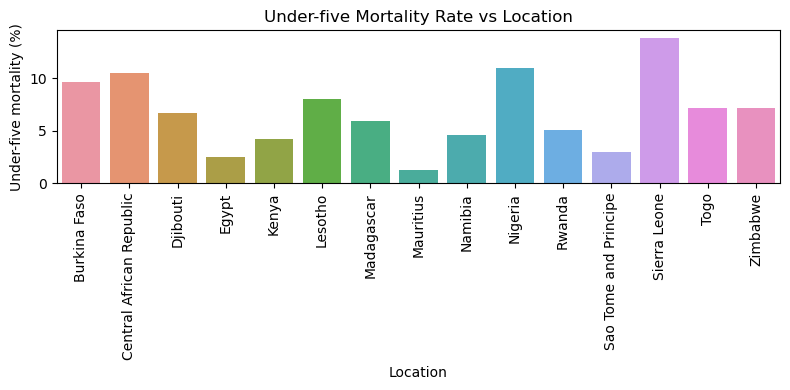

In [82]:
#visualization of the relationship between location and under-five mortality rate
#putting the figure size of the plot
plt.figure(figsize=(8, 4))

#creating the bar plot
sns.barplot(x='Location', y='Under-five mortality (%)', data=africa_df)

#putting of titles and labels
plt.title('Under-five Mortality Rate vs Location')
plt.xlabel('Location')
plt.ylabel('Under-five mortality (%)')
plt.xticks(rotation=90)
plt.tight_layout()

#showing the plot
plt.show()

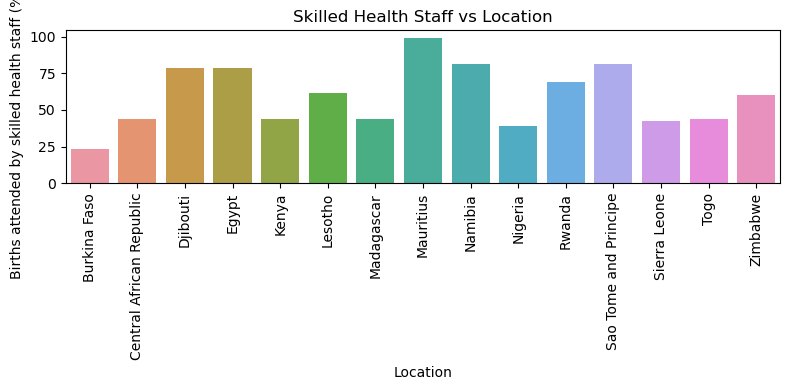

In [83]:
#visualization of the relationship between location and births attended by skilled health staff
#putting the figure size
plt.figure(figsize=(8, 4))

#creating the barplot
sns.barplot(x='Location', y='Births attended by skilled health staff (% of total)', data=africa_df)

#putting the titles
plt.title('Skilled Health Staff vs Location')
plt.xlabel('Location')
plt.ylabel('Births attended by skilled health staff (% of total)')
plt.xticks(rotation=90)
plt.tight_layout()

#showing the plot
plt.show()

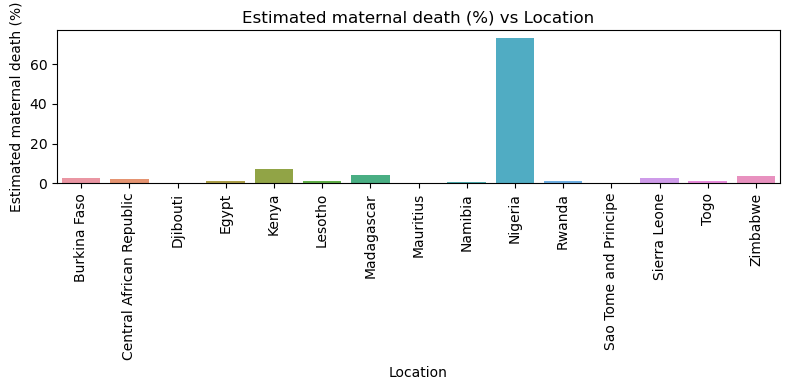

In [84]:
#visualization of the relationship between location and estimated maternal death
#creating the plot size
plt.figure(figsize=(8, 4))

#creating the bar plot
sns.barplot(x='Location', y='Estimated maternal death (%)', data=africa_df)

#creating/putting the titles
plt.title('Estimated maternal death (%) vs Location')
plt.xlabel('Location')
plt.ylabel('Estimated maternal death (%)')
plt.xticks(rotation=90)
plt.tight_layout()

#showing the plot
plt.show()

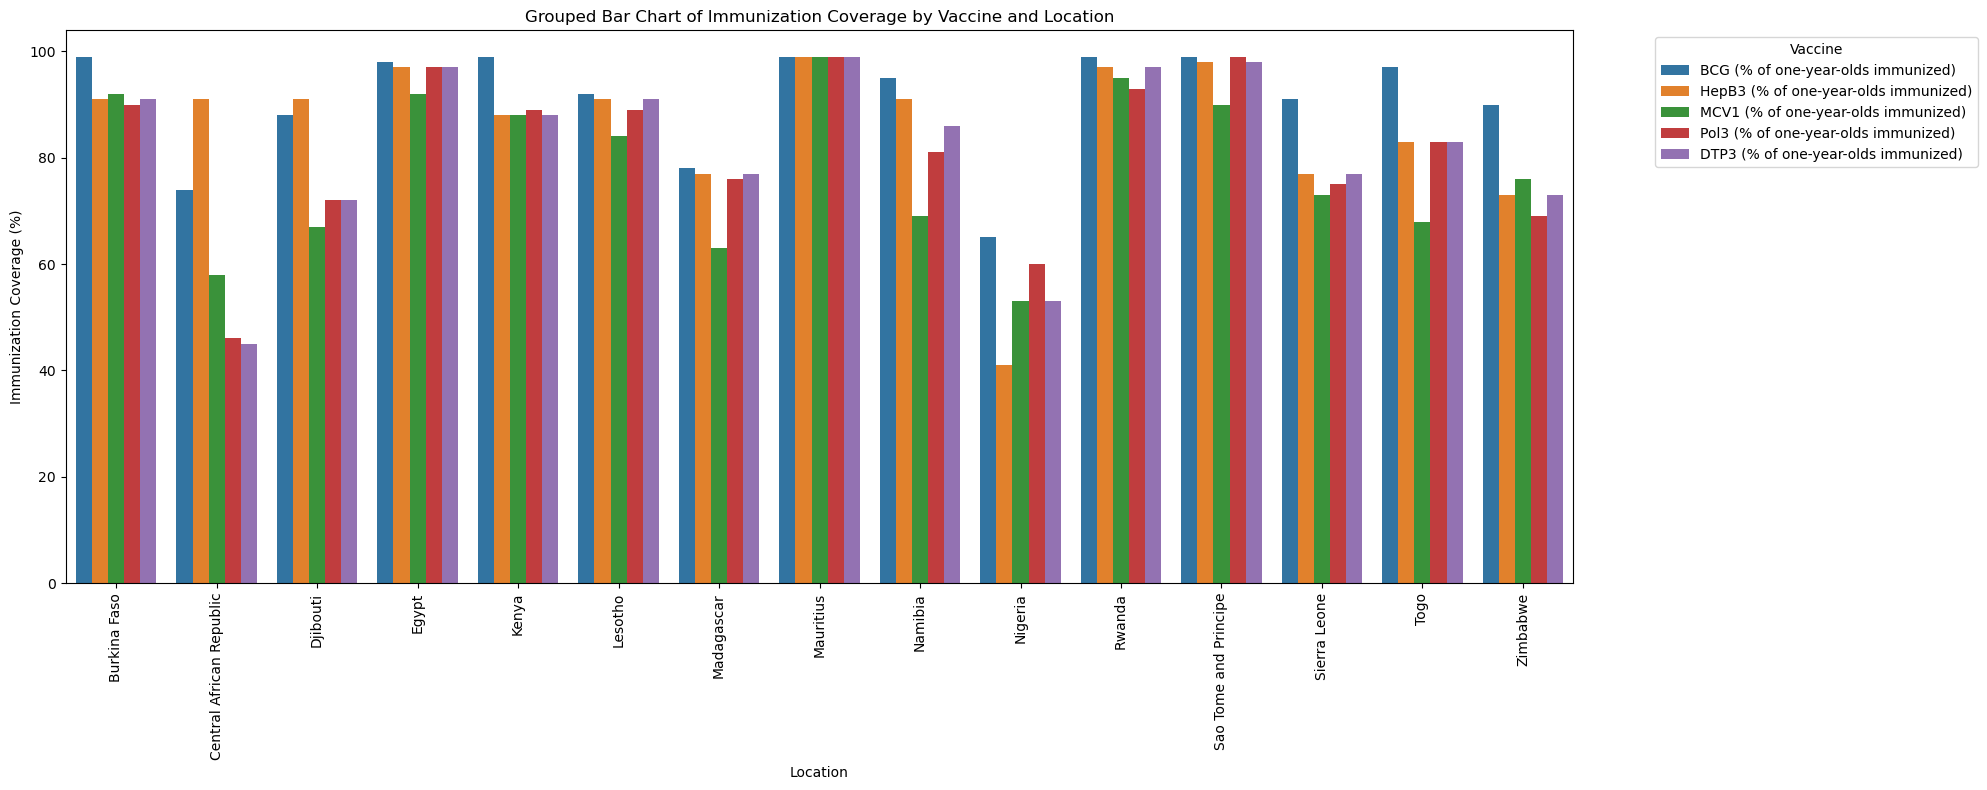

In [85]:
#visualization of the relationship between location and percentage of one year olds immunized
#assigning a variable to the columns that has to do with immunization
vaccines = ['BCG (% of one-year-olds immunized)',
            'HepB3 (% of one-year-olds immunized)',
            'MCV1 (% of one-year-olds immunized)',
            'Pol3 (% of one-year-olds immunized)',
            'DTP3 (% of one-year-olds immunized)']

#reshaping of the dataframe from a wide format into a more distinct long format
long_df = africa_df.melt(id_vars=['Location'], value_vars=vaccines, var_name='Vaccine', value_name='Coverage')

#creating a figure size
plt.figure(figsize=(20, 8))

#creating the bar plot
sns.barplot(x='Location', y='Coverage', hue='Vaccine', data=long_df)

#putting the titles and customizing
plt.title('Grouped Bar Chart of Immunization Coverage by Vaccine and Location')
plt.xlabel('Location')
plt.ylabel('Immunization Coverage (%)')
plt.xticks(rotation=90)
plt.legend(title='Vaccine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#showing the plot
plt.show()

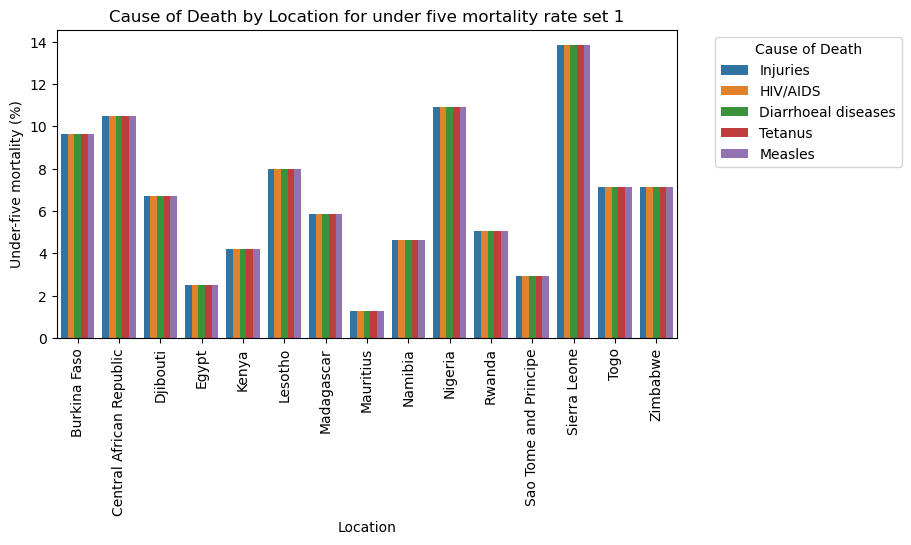

In [86]:
#visualization of the impact of location on the vaccine coverage
#the variables in the cause of death was split into two set for better and clearer visualization

#creating a list for the first set of cause of death
disease_1 = ['Other communicable, perinatal and nutritional conditions'
            'Other noncommunicable diseases', 'Injuries', 'HIV/AIDS',
            'Diarrhoeal diseases', 'Tetanus', 'Measles'] 

#filtering of the list of disease_1 from the cause of death column
filtered_disease1 = africa_df[africa_df['Cause of Death'].isin(disease_1)]

#creating a figure size
plt.figure(figsize=(8, 4))

#creating the bar plot
sns.barplot(x='Location', y='Under-five mortality (%)', hue='Cause of Death', data=filtered_disease1)

#addition of titles and labels
plt.title('Cause of Death by Location for under five mortality rate set 1')
plt.xlabel('Location')
plt.ylabel('Under-five mortality (%)')
plt.xticks(rotation=90)
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')

#showing of the plot
plt.show()

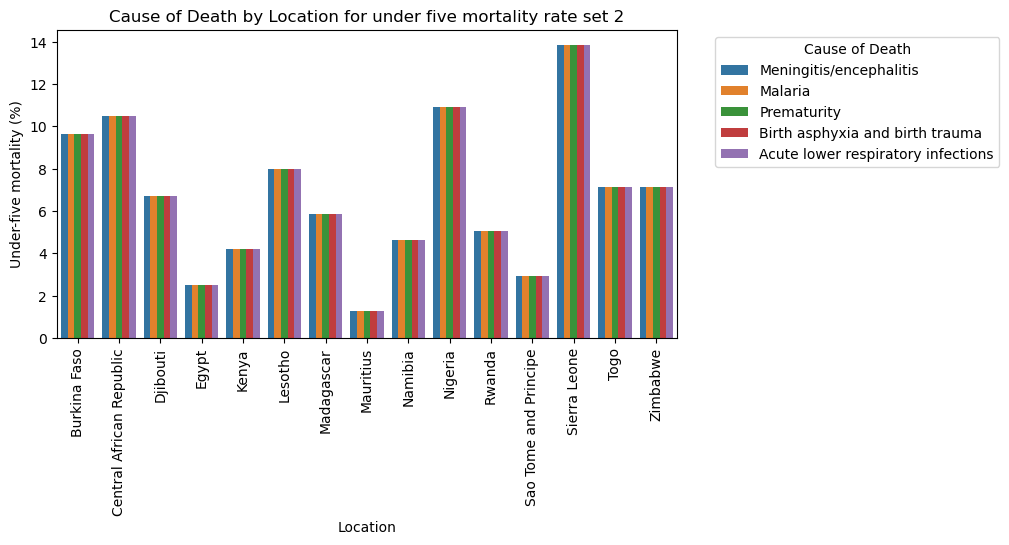

In [87]:
#creating a list for the second set of cause of death
disease_2 = ['Meningitis/encephalitis', 'Malaria', 'Prematurity',
            'Birth asphyxia and birth trauma', 'Congenital anomalies'
            'Sepsis and other infectious conditions of the newborn', 
            'Acute lower respiratory infections'] 

#filtering of the list of disease_2 from the cause of death column
filtered_disease2 = africa_df[africa_df['Cause of Death'].isin(disease_2)]

#creating the grouped bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='Location', y='Under-five mortality (%)', hue='Cause of Death', data=filtered_disease2)

#titles and labels addition
plt.title('Cause of Death by Location for under five mortality rate set 2')
plt.xlabel('Location')
plt.ylabel('Under-five mortality (%)')
plt.xticks(rotation=90)
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')

#showing the plot
plt.show()

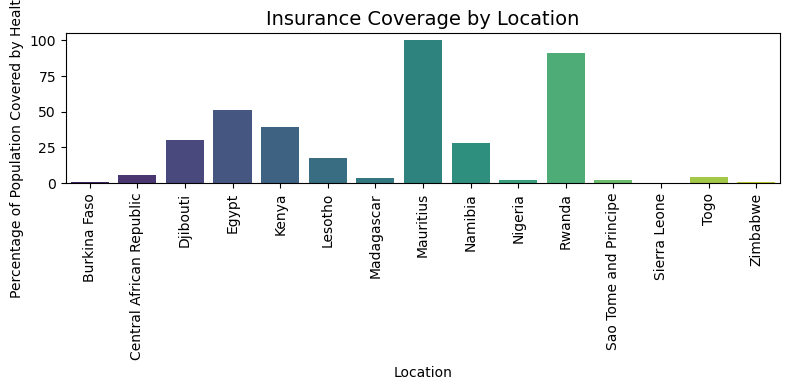

In [88]:
#creating of the figure size
plt.figure(figsize=(8, 4))

#creating of the bar plot
sns.barplot(x='Location', y='Share of population covered by health insurance (ILO (2014))', data=africa_df, palette='viridis')

#addition of titles and labels
plt.title('Insurance Coverage by Location', fontsize=14)
plt.xlabel('Location')
plt.ylabel('Percentage of Population Covered by Health Insurance')
plt.xticks(rotation=90)
plt.tight_layout()

#showing of the plot
plt.show()

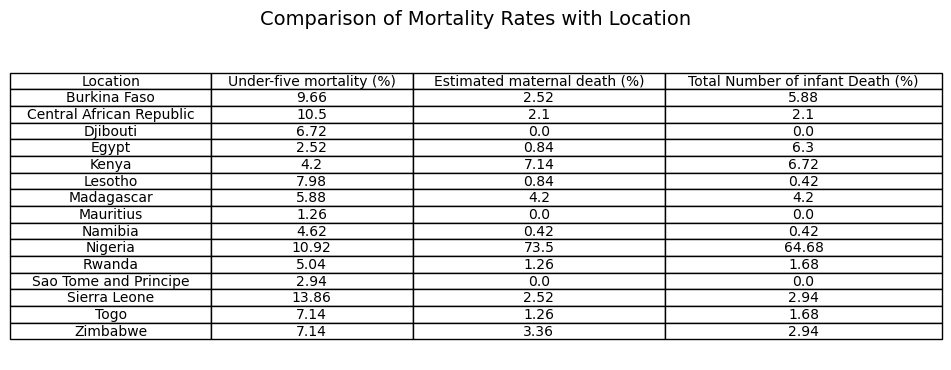

In [89]:
#mortality indicator comparism (under five mortality, estimated maternal death and total number of infant death) with the location
#grouping of the location
location_mortality = africa_df.groupby('Location')[['Under-five mortality (%)', 'Estimated maternal death (%)', 
                                                    'Total Number of infant Death (%)']].mean()

#using the reset index to convert it to a standard dataframe and round up the figures to 2decimals
location_mortality_reset = location_mortality.reset_index().round(2)

#creating a figure
fig, ax = plt.subplots(figsize=(6, 4))

#removing/turning off the axes for a better table visualization
ax.axis('off') 

#using Matplotlib to create a table
table = plt.table(cellText=location_mortality_reset.values, colLabels=location_mortality_reset.columns,  loc='center', cellLoc='center')

#setting the table style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(location_mortality_reset.columns))))

#adding of titles 
plt.title("Comparison of Mortality Rates with Location", fontsize=14, pad=20)

#show the table
plt.show()

For the environmental factors, using the location as an impact on the mortality indicators (Under-five mortality rate (per 100 live births), Estimated maternal deaths), Births attended by skilled health staff (% of total), vaccine coverage and cause of death, it can be seen that for under five mortality, Mauritius had the least rate of mortality while Sierra Leone and Nigeria had the highest rate. Mauritius also had the highest value for skilled health staff and vaccine administration while Nigeria and Burkina Faso recorded the least for skilled health staff and vaccine administration this could be due to low man power in the health sector, lack of the importance on the administration of vaccine to mothers and could also be due to the low insurance coverage.

2. Propose actionable recommendations to address gaps in vaccination coverage, healthcare access, and maternal support.

Vaccination coverage

1. Educational campaign through effective coummunication system on the importance of vaccination should be set up.
2. Vaccine supply should be improved which could involve the use of cold chain logistics for preservation of vaccine and the use of mobile clinic to get to remote areas

Healthcare access

1. Build and equip health facilities and ensure availability in rural areas.
2. There should be more training of health staff and continuous learning should be enforced on skilled health staffs such as seminar, workshop, presentation.

Maternal support

1. Provide efficient transport system to transport pregnant woment from homes to hospital.
2. Provide free essential medicine which are important to pregnant women and for the proper development of the unborn children

3. Present insights in a format that is accessible to policymakers and stakeholders

Vaccination coverage
1. Mobile vaccination units should be deployed inorder to reach remote areas
2. Provision of incentives for vaccination in order to encourage parents to bring their children for vaccination
3. Insightful educational campaigns on the importance of vaccination

Healthcare Access
1. Provide virtual healthcare consultations for remote communities.
2. Invest in affordable digital health platforms.
3. Build and Staff Primary Healthcare Centers (PHCs)
4. Introduce Subsidized Health Insurance

Maternal support
1. Government should increase the annual budget allocation on health care sector
2. Enforce nutrition and maternal health programs
3. Advocate for paid maternity leave to support working mothers and promote workplace flexibility for postnatal recovery
4. Provide follow-up care for mothers and newborns and include mental health support and newborn assessments.

Limitations

1. Lack of Environmental Data in the Dataset
The dataset does not explicitly include environmental factors such as access to clean water, air quality, or food security, which are very important in understanding child and infant mortality. This limits the ability to draw robust conclusions about environmental influences.

2. Socioeconomic factors like income level, poverty rate, which are potentially significant drivers of mortality were not included in the dataset. This resulted in a limited analysis of the impact of socio economic factors on the mortality rate.

Acknowlwdgement
I am eternally grateful to Almighty God for His guidance and grace throughout this journey. 
My deepest appreciation goes to the anchors of this internship, Regonet, for providing such a conducive environment for learning. 
I extend my heartfelt thanks to my tutor, Mr. Dada Dayo, for his relentless support, invaluable knowledge, and encouragement. 
Finally, my profound gratitude goes to my unwavering support system, Peace Ejimbe-Odjegba, for her constant motivation and encouragement, especially during this project.